<a href="https://colab.research.google.com/github/vanle2000/Data-Science-Salary-prediction/blob/main/Data_Sciece_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


`ds_salaries.csv` dataset 11 variables: 
* `work_year`: Salary payment year
* `experience_level`: Experience level at the job during the year
* `employment_type`: Type of employement
* `job_title`: Job role during the year
* `salary`: Total gross salary amount
* `salary_currency`: Currency of salary, paid as an ISO 4217 currency code
* `salary_in_usd`: Salary in USD
* `employee_residence`: Employee's primary country of residence, as an ISO 3166 country code
* `remote_ratio`: Overall amount of work done remotely
* `company_location`: Country of employer's main office or contracting branch, as an ISO 3166 country code
* `company_size`: Amount of people worked for the company

# 1. Data Preprocessing:

In [ ]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Drop `salary_currency` and `salary` since we will use `salary_in_usd` only.

In [ ]:
df = df.drop('salary', axis=1, inplace=False)
df = df.drop('salary_currency', axis=1, inplace=False)

## 1.1. Feature Extraction 


### 1.1.1. Job Title:

In [ ]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

Recategorize job title into 6 categories: Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Applied Research Scientist, Other. 

In [ ]:
def title_group(title):
  data_scientist_title = ['Data Scientist', 'Lead Data Scientist', 'Director of Data Science', 'Data Science Manager', 'Head of Data',
                          'AI Scientist', 'Principal Data Scientist', 'Head of Data Science', 'Staff Data Scientist']

  data_engineer_title = ['Big Data Engineer', 'Lead Data Engineer', 'Data Engineer', 'Data Engineering Manager', 'Cloud Data Engineer',
                         'Data Architect', 'Director of Data Engineering', 'Principal Data Engineer',  'Big Data Architect', 'ETL Developer',
                         'Data Science Engineer']

  data_analyst_title = ['Product Data Analyst', 'Data Analyst', 'Business Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Data Analytics Manager'
                        'Financial Data Analyst',  'Marketing Data Analyst', 'Data Analytics Engineer', 'Data Analytics Lead', 'Finance Data Analyst', 
                        'Principal Data Analyst', 'Analytics Engineer']

  mle_title = ['Machine Learning Engineer', 'Machine Learning Manager', 'ML Engineer', 'Computer Vision Engineer', 'Lead Machine Learning Engineer',  
               'Machine Learning Infrastructure Engineer', 'Machine Learning Developer', 'Head of Machine Learning', 'NLP Engineer',
               'Computer Vision Software Engineer']

  research_scientist_title = ['Machine Learning Scientist', 'Research Scientist', '3D Computer Vision Researcher', 'Applied Data Scientist',
                                'Applied Machine Learning Scientist']
                      
  others = ['Data Science Consultant', 'Data Specialist']

  if title in data_scientist_title:
    return 'Data Scientist'

  elif title in data_engineer_title:
    return 'Data Engineer'

  elif title in data_analyst_title:
    return 'Data Analyst'

  elif title in mle_title:
    return 'MLE'
  
  elif title in research_scientist_title:
    return 'Applied Research Scientist'
  
  else:
    return 'Others'
    

In [ ]:
df['job_title'] = df['job_title'].apply(title_group)
df['job_title'].value_counts()

Data Scientist                189
Data Engineer                 175
Data Analyst                  126
MLE                            66
Applied Research Scientist     34
Others                         17
Name: job_title, dtype: int64

Text(0, 0.5, 'Number of Job Postings')

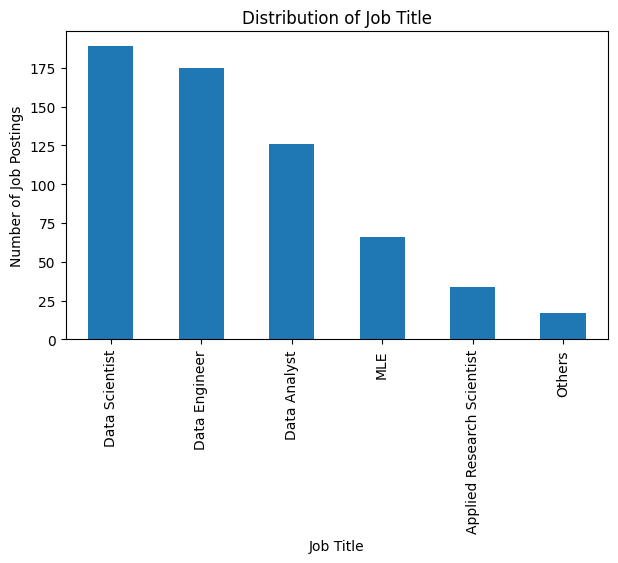

In [ ]:
plt.figure(figsize=(7,4))
df['job_title'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')

### 1.1.2. Residency:


In [ ]:
df['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [ ]:
def categorize_region(residency):
  Europe = ['DE', 'GB', 'HU', 'FR', 'PL', 'PT', 'GR', 'NL', 'AT', 'ES', 'DK', 'IT', 'HR', 
            'BG', 'BE', 'UA', 'MT', 'RO', 'SI', 'RS', 'LU', 'JE', 'CZ', 'IE', 'CH']
  North_America = ['US', 'MX', 'CA']
  South_America = ['HN', 'BR', 'AR', 'BO', 'CO', 'PR']
  Asia = ['JP', 'IN', 'PK', 'CN', 'AE', 'SG', 'VN', 'HK', 'TR', 'MY']
  Australia = ['NZ', 'AU']
  Africa = ['NG', 'TN', 'KE', 'DZ']

  if residency in Europe:
    return 'Europe'
  elif residency in North_America:
    return 'North America'
  elif residency in South_America:
    return 'South America'
  elif residency in Asia:
    return 'Asia'
  elif residency in Australia:
    return 'Australia'
  else: 
    return 'Africa'

In [ ]:
df['continent'] = df['employee_residence'].apply(categorize_region)
df.drop('employee_residence', axis=1, inplace=True)

Create box plot to observe the distribution based on continents:

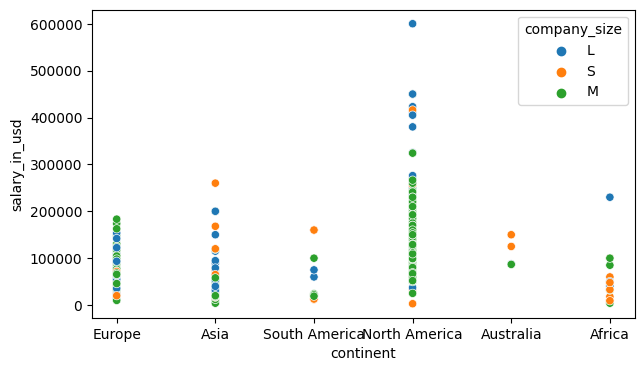

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='continent', y='salary_in_usd', hue= 'company_size')
plt.show()

### 1.1.3. Company Location:

In [ ]:
df['company_location'] = df['company_location'].apply(categorize_region)

<Axes: >

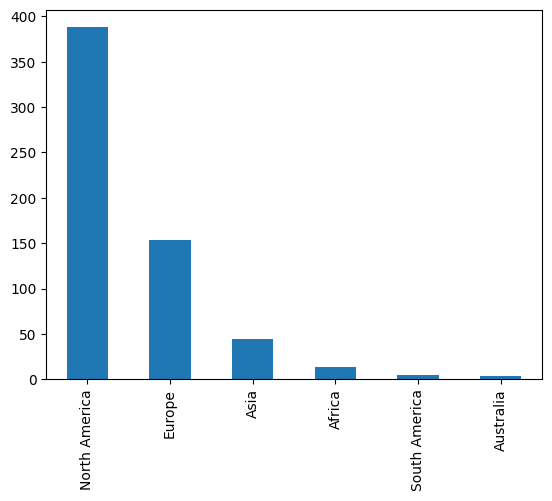

In [ ]:
df['company_location'].value_counts().plot(kind='bar')

### 1.1.4. Employment Type:

In [ ]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

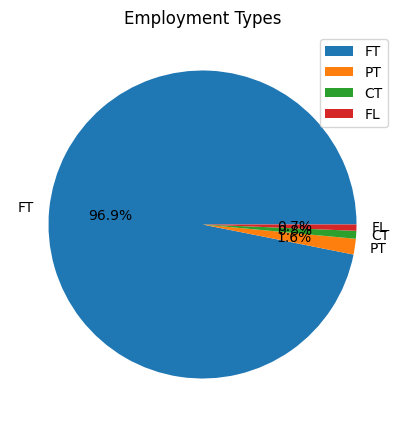

In [ ]:
employment_counts = df['employment_type'].value_counts()

# Create a pie chart with the percentages
plt.figure(figsize=(10, 5))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%')
plt.legend()
plt.title('Employment Types')
plt.show()

## 1.2. Data Visualization

<ipython-input-18-f64445f86be4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, ci=None)


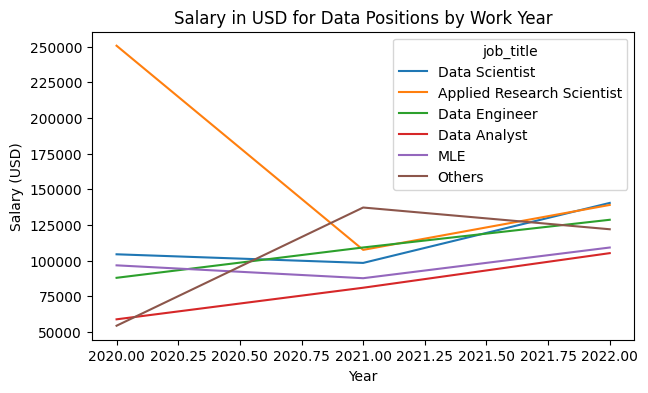

In [ ]:
plt.figure(figsize=(7, 4))
sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df, ci=None)
plt.title('Salary in USD for Data Positions by Work Year')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.show()


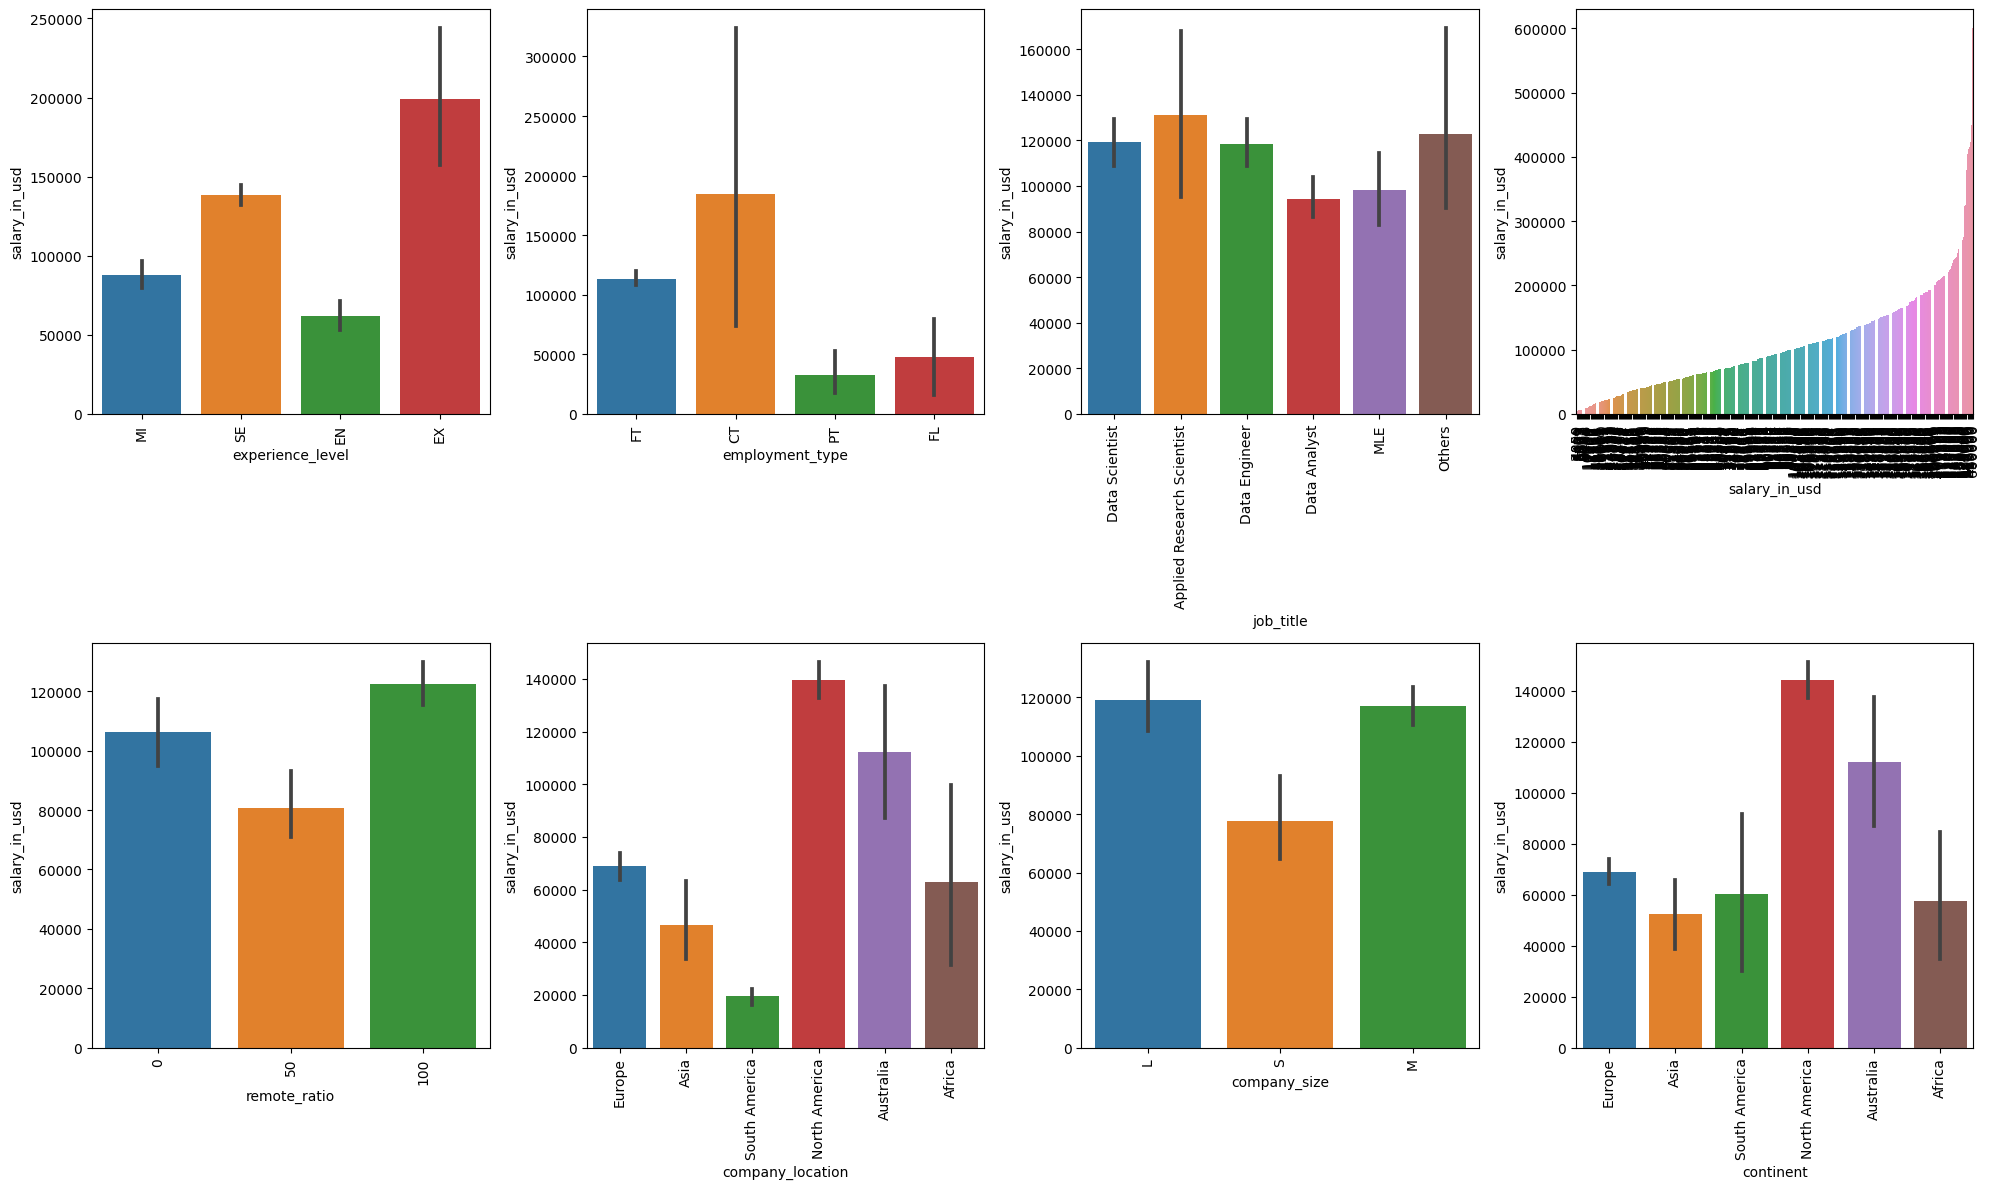

In [ ]:
cat_vars = ['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
            'remote_ratio', 'company_location', 'company_size', 'continent'] 
        
fig, ax = subplots(figsize=(20, 12), nrows=2, ncols=4)
ax = ax.flatten()

for i, var in enumerate(cat_vars):
  sns.barplot(data=df, x=var, y='salary_in_usd', ax=ax[i], estimator=np.mean)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

## 1.3. Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df:
  if col in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    # Fit and transform 
    df[col] = encoder.fit_transform(df[col])

    print(f"{col}: {df[col].unique()}")

df.head()

experience_level: [2 3 0 1]
employment_type: [2 0 3 1]
job_title: [3 0 2 1 4 5]
company_location: [3 1 5 4 2 0]
company_size: [0 2 1]
continent: [3 1 5 4 2 0]


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,continent
0,0,2020,2,2,3,79833,0,3,0,3
1,1,2020,3,2,0,260000,0,1,2,1
2,2,2020,3,2,2,109024,50,3,1,3
3,3,2020,2,2,1,20000,0,5,2,5
4,4,2020,3,2,4,150000,50,4,0,4


<Axes: >

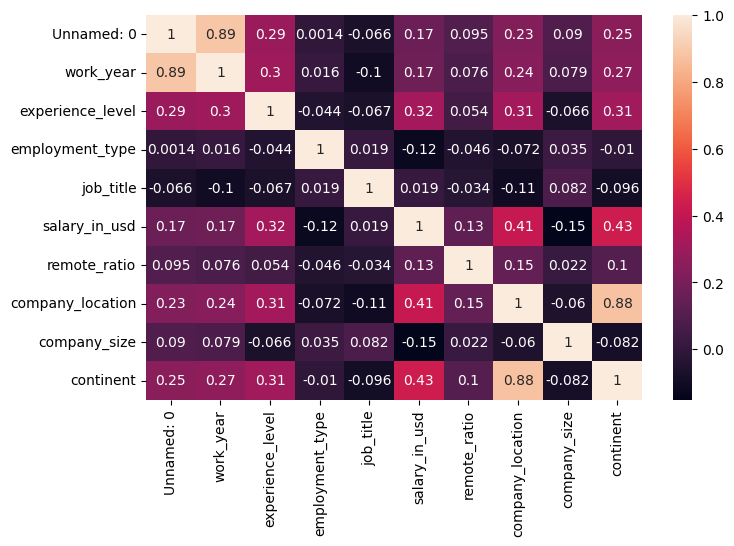

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2g')

# 2. Prediction Models:

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressorfrom sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

## 2.1. Train Test Split:

In [28]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

## 2.2. Model Training:


2.2.1. Decision Tree Regressor: 

In [ ]:
dtRegressor = DecisionTreeRegressor()

param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(dtRegressor, 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

1. Predictive modeling of data scientist salaries: Build a predictive model that can forecast the salaries of data scientists based on a variety of factors 
2. Job title and salary: Analyze the relationship between job titles and salaries of data scientists. You can group data scientists into categories based on their job titles and examine the average salaries for each group.
3. Salary distribution: Examine the distribution of salaries of data scientists and identify any outliers or patterns in the data.